In [1]:
pip install -U imbalanced-learn

In [1]:
# Imports

import glob
import string
import ast

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, f1_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve



In [2]:
# import CC_Fraud from your computer, you need to change your source...

df = pd.read_csv (r'/Users/sunqiaoyubing/Downloads/CC_Fraud.csv')
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [3]:
from pandas import DataFrame
X_all = df.drop(['Class'], axis=1)
y_all = df['Class']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=25
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 0.17
% Positive class in Test  = 0.2


In [5]:
##Apply ROSE

from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=0)

X_sampler, y_sampler = sampler.fit_resample(X_all, y_all)

print(f'''Shape of X before ROSE: {X_all.shape}
Shape of X after ROSE: {X_sampler.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sampler.value_counts(normalize=True) * 100

Shape of X before ROSE: (284807, 30)
Shape of X after ROSE: (568630, 30)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Class, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
  X_sampler, y_sampler, test_size=0.2, random_state=25)

# Modelling
## Logistic Regression All-ROSE


In [12]:
#logistics regression 1
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.078224
         Iterations 15
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.887      
Dependent Variable: Class            AIC:              71228.4300 
Date:               2022-04-25 00:43 BIC:              71559.2653 
No. Observations:   454904           Log-Likelihood:   -35584.    
Df Model:           29               LL-Null:          -3.1531e+05
Df Residuals:       454874           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     15.0000                                       
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
Time     -0.0000     0.0000   -182.5402   0.0000   -0.0000   -0.0000
V1        0.3110     0.0127     24.4390   0.

In [13]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9697430344047191


In [14]:
#logreg = LogisticRegression(penalty='l2')
logreg = LogisticRegression(penalty='l2',C= 0.01)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [15]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     57261
           1       0.97      0.95      0.96     56465

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



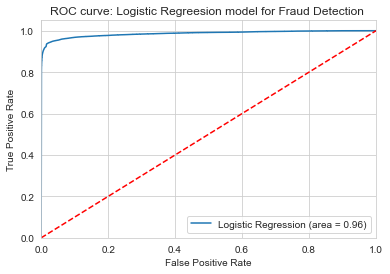

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: Logistic Regreesion model for Fraud Detection ')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 50.09
% Positive class in Test  = 49.65


Accuracy = 0.96
Recall = 0.95



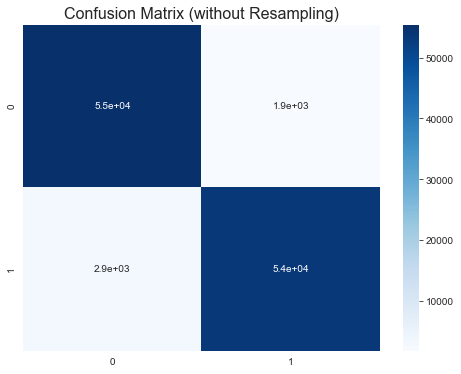

In [22]:
from sklearn.metrics import recall_score
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without Resampling)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [25]:
# Average precision score
y_score = logreg.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.9893016915987329


In [26]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9893899613191661


/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Binary class Precision-Recall curve: AP=0.99')

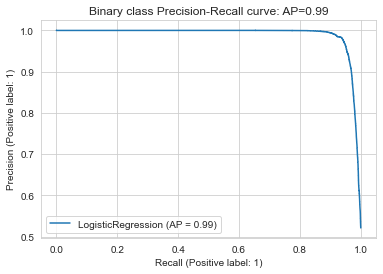

In [28]:
disp = plot_precision_recall_curve(logreg, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [29]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.9160000612281525

## Decision Tree All-SMOTE

In [9]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [10]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=10)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

[Text(0.3318270905923345, 0.9545454545454546, 'X[14] <= -1.705\ngini = 0.5\nsamples = 454904\nvalue = [227054, 227850]'),
 Text(0.1253538763066202, 0.8636363636363636, 'X[4] <= -0.16\ngini = 0.067\nsamples = 218431\nvalue = [7533, 210898]'),
 Text(0.031794425087108016, 0.7727272727272727, 'X[17] <= -2.754\ngini = 0.244\nsamples = 3773\nvalue = [3236, 537]'),
 Text(0.006968641114982578, 0.6818181818181818, 'X[4] <= -0.896\ngini = 0.109\nsamples = 225\nvalue = [13, 212]'),
 Text(0.003484320557491289, 0.5909090909090909, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.010452961672473868, 0.5909090909090909, 'X[12] <= -3.633\ngini = 0.009\nsamples = 213\nvalue = [1, 212]'),
 Text(0.006968641114982578, 0.5, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.013937282229965157, 0.5, 'gini = 0.0\nsamples = 208\nvalue = [0, 208]'),
 Text(0.05662020905923345, 0.6818181818181818, 'X[0] <= 166525.484\ngini = 0.166\nsamples = 3548\nvalue = [3223, 325]'),
 Text(0.036585365853658534, 0.59090

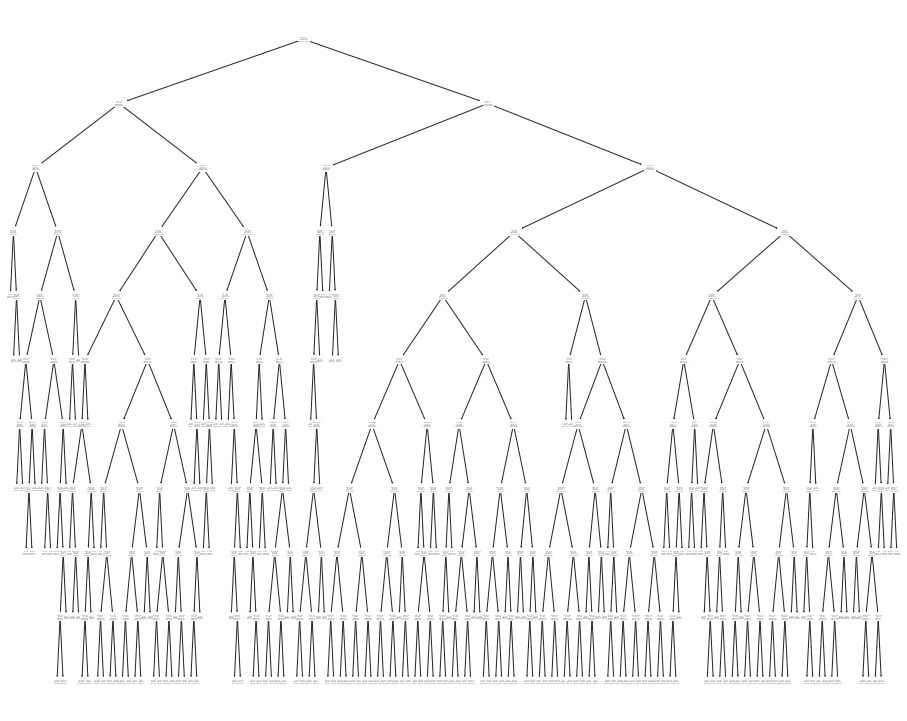

In [13]:
plt.figure(figsize=(16,13))

from sklearn import tree

y_pred = clf_gini.predict(X_test)
tree.plot_tree(clf_gini.fit(X_train,y_train)) 

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     57261
           1       0.99      0.99      0.99     56465

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



Accuracy = 0.99
Recall = 0.99



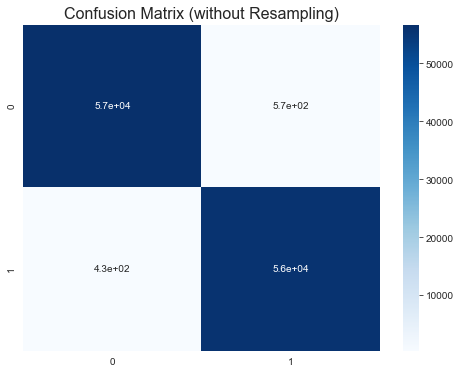

In [15]:
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without Resampling)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [16]:
# Average precision score
y_score = clf_gini.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.9967038355972784


In [17]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9945611311635929


/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Binary class Precision-Recall curve: AP=1.00')

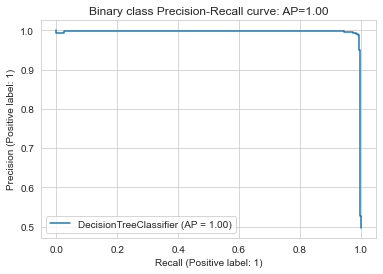

In [18]:
disp = plot_precision_recall_curve(clf_gini, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [20]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.9823984847291326

## Random Forest All-SMOTE

In [ ]:
rf_clf = RandomForestClassifier()

parameters = {'n_estimators': [10,20,25],
              'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30]
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(rf_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_clf = grid_obj.best_estimator_

rf_clf.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=50)
ada.fit(Xs_train, y_train)
y = ada.predict(Xs_test)
accuracy_score(y, y_test)

In [ ]:
a_svm = cross_val_score(ada, X_train, y_train, cv=10)
print a_svm,np.mean(a_svm) 

In [7]:
#rf
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt


print roc_auc_score(y_test, y_pred[:,1])

fpr, tpr, _ = roc_curve(y_test, y_pred[:,1])

plt.clf()
plot.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without Resampling)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
# Average precision score
y_score = rf.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

In [ ]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

In [ ]:
disp = plot_precision_recall_curve(rf, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
matthews_corrcoef(y_test, y_pred)

## Support Vector Machine All_ROSE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
svm.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
clf_svm = svm.SVC(kernel='rbf',c= ,gamma=)
clf_svm.fit(X, y)

In [ ]:
grid_predictions = svc.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
# Average precision score
y_score = clf_gini.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

In [ ]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

In [ ]:
disp = plot_precision_recall_curve(clf_gini, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
matthews_corrcoef(y_test, y_pred)